In [12]:
###https://www.kaggle.com/royportas/movie/data

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

# load data from cvs file and skip the first row
df = pd.read_csv('/Users/yanzhu/Documents/machinelearning/springboard/movie_recommendation/data/src/movie_metadata.csv')

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [24]:
df.director_name.astype('category').cat.categories


Index(['A. Raven Cruz', 'Aaron Hann', 'Aaron Schneider', 'Aaron Seltzer',
       'Abel Ferrara', 'Adam Brooks', 'Adam Carolla', 'Adam Goldberg',
       'Adam Green', 'Adam Jay Epstein',
       ...
       'Zack Snyder', 'Zack Ward', 'Zackary Adler', 'Zak Penn',
       'Zal Batmanglij', 'Zoran Lisinac', 'Álex de la Iglesia',
       'Émile Gaudreault', 'Éric Tessier', 'Étienne Faure'],
      dtype='object', length=2398)

In [25]:
df.color.astype('category').cat.categories

Index([' Black and White', 'Color'], dtype='object')

In [84]:
# There are not so much nans in data,we will simple all rows having nan.
print(df.num_critic_for_reviews.isnull().sum())
print(df.duration.isnull().sum())
print(df.director_facebook_likes.isnull().sum())
print(df.actor_3_facebook_likes.isnull().sum())
print(df.actor_2_facebook_likes.isnull().sum())
print(df.actor_1_facebook_likes.isnull().sum())
print(df.gross.isnull().sum())
print(df.num_user_for_reviews.isnull().sum())
print(df.genres.isnull().sum())
%timeit 
df.isnull().values.sum()
df.isnull().any().any()
df.isnull().any()

def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 
missing_values_table(df)

50
15
104
23
13
7
884
21
0


,Missing Values,% of Total Values
color,19,0.376760
director_name,104,2.062265
num_critic_for_reviews,50,0.991473
duration,15,0.297442
director_facebook_likes,104,2.062265
actor_3_facebook_likes,23,0.456078
actor_2_name,13,0.257783
actor_1_facebook_likes,7,0.138806
gross,884,17.529248
genres,0,0.000000


In [75]:
df.shape[1]

28

In [52]:
print(df.columns)
df.info()
from datetime import datetime
df_new = pd.read_csv('/Users/yanzhu/Documents/machinelearning/springboard/movie_recommendation/data/src/movie_metadata.csv',
                    usecols=['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
                             'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name','movie_title', 'num_voted_users', 'cast_total_facebook_likes',
                             'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
                             'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
                             'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
                             'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
                    dtype={'color':'category', 
                           'director_name':'category',
                           'num_critic_for_reviews':float,
                           'duration': float,
                           'director_facebook_likes':float,
                           'actor_3_facebook_likes':float,
                           'actor_2_name':str,
                           'actor_1_facebook_likes':float,
                           'gross':float,
                           'genres':str,
                           'actor_1_name':str,
                           'movie_title':str, 
                           'num_voted_users':float, 
                           'cast_total_facebook_likes':float,
                           'actor_3_name':str,
                           'facenumber_in_poster':float,
                           'plot_keywords':str,
                           'movie_imdb_link':str,
                           'num_user_for_reviews':float,
                           'language':'category',
                           'country':'category',
                           'content_rating':'category',
                           'budget':float,
                           'title_year':str,
                           'actor_2_facebook_likes':float,
                           'imdb_score':float,
                           'aspect_ratio':float,
                           'movie_facebook_likes':float},)
print(df_new.info())

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_

In [56]:
# Drop the rows where any of the elements is nan
df_new2 = df_new.dropna(axis=0, how='any')
df_new2.shape

(3756, 28)

In [85]:
%store df_new2


Stored 'df_new2' (DataFrame)


In [193]:

#y = np.asarray(array['imdb_score'], dtype="|S6")

In [201]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = df_nonan.values
X = array[:,9:21]
y = list(array[:,21])

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

ValueError: Unknown label type: (array([ 7.9,  7.1,  6.8, ...,  6.9,  6.4,  6.6]),)

AttributeError: 'PCA' object has no attribute 'scores_'

In [202]:
# I am not sure which features is good for predicting a move's imdb score
# https://machinelearningmastery.com/feature-selection-machine-learning-python/
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

ValueError: Unknown label type: array([ 7.9,  7.1,  6.8, ...,  6.9,  6.4,  6.6])

In [199]:
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

Explained Variance: [  9.122e-01   8.775e-02   2.518e-07]
[[ -6.121e-08  -7.230e-09  -2.748e-07  -1.275e-06  -7.864e-07  -3.671e-07
   -3.479e-02  -4.991e-05  -2.706e-06   1.979e-10  -1.418e-07  -9.994e-01]
 [ -8.140e-07  -7.894e-08  -6.070e-06  -3.203e-05  -1.632e-05  -8.056e-06
   -9.994e-01  -1.354e-03  -6.427e-05   8.219e-10  -3.190e-06   3.479e-02]
 [  4.053e-04   4.574e-05   7.073e-03   1.571e-02   4.382e-03   1.673e-03
   -1.356e-03   9.996e-01   2.190e-02  -2.798e-07   1.947e-03  -2.794e-06]]


In [200]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

#array = df_nonan.values
#X = array[:,9:22]
#y = array[:,21]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

ValueError: Unknown label type: array([[7.9],
       [7.1],
       [6.8],
       ..., 
       [6.9],
       [6.4],
       [6.6]], dtype=object)

In [203]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg =  linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

ValueError: Found arrays with inconsistent numbers of samples: [1143 2664]

In [2]:
data[data.director_name == 'James Cameron'][['movie_title', 'budget', 'gross']]

,movie_title,budget,gross
0,Avatar,237000000.0,760505847.0
26,Titanic,200000000.0,658672302.0
288,Terminator 2: Judgment Day,102000000.0,204843350.0
291,True Lies,115000000.0,146282411.0
606,The Abyss,69500000.0,54222000.0
2486,Aliens,18500000.0,85200000.0
3575,The Terminator,6500000.0,38400000.0


/Users/yanzhu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """


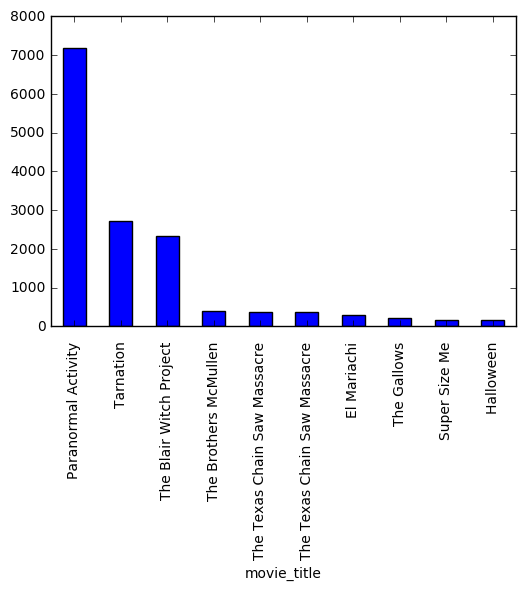

In [3]:
a = data[['movie_title','director','genres', 'plot_keywords','imdb_score', 'title_year', 'movie_imdb_likes','number_voted_users','cast_total_facebook_likes']]
a = a.set_index('movie_title')
profit = a['gross'] / a['budget']
a['profit_ratio'] = profit
a.sort('profit_ratio', ascending=False)['profit_ratio'].head(10).plot('bar')

In [12]:
\b = data[['movie_title','director_name','genres','plot_keywords','imdb_score','title_year','movie_imdb_link','num_voted_users','cast_total_facebook_likes']]
#data.columns.values
b['genres']

0                         Action|Adventure|Fantasy|Sci-Fi
1                                Action|Adventure|Fantasy
2                               Action|Adventure|Thriller
3                                         Action|Thriller
4                                             Documentary
5                                 Action|Adventure|Sci-Fi
6                                Action|Adventure|Romance
7       Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                                 Action|Adventure|Sci-Fi
9                        Adventure|Family|Fantasy|Mystery
10                                Action|Adventure|Sci-Fi
11                                Action|Adventure|Sci-Fi
12                                       Action|Adventure
13                               Action|Adventure|Fantasy
14                               Action|Adventure|Western
15                        Action|Adventure|Fantasy|Sci-Fi
16                        Action|Adventure|Family|Fantasy
17            

In [4]:
directors = data.groupby('director_name').sum()
movie_count = data.groupby('director_name').count()['color']
directors['movie_count'] = movie_count
#directors = data.groupby('director_name').sum().sort('budget', ascending=False)[['budget']]

avg_budget = directors['budget'] / directors['movie_count']
directors['avg_budget'] = avg_budget
directors.sort('avg_budget', ascending=False)[['budget', 'movie_count', 'avg_budget']]

/Users/yanzhu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,budget,movie_count,avg_budget
director_name,,,
Charles Matthau,6.000000e+06,0,inf
Brandon Landers,1.735000e+04,0,inf
Jonathan Meyers,1.000000e+06,0,inf
Dave Rodriguez,1.500000e+06,0,inf
Richard Rich,7.000000e+06,0,inf
Darin Scott,3.000000e+06,0,inf
Zackary Adler,2.500000e+06,0,inf
Tung-Shing Yee,1.500000e+07,0,inf
Joon-ho Bong,1.225470e+10,2,6.127350e+09
